In [18]:
%matplotlib inline

<h1><center>Eknoor Singh</center></h1>
<h1><center>20853256</center></h1>
<h1><center>Date: Sept 25 2023</center></h1>

# SYDE 522 Assignment 1
## Perceptrons and Regression

### Due: Monday Sept 25 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1: Implementing a Perceptron

The following code generates the same data that was used to demonstrate the Perceptron in class:

In [7]:
import sklearn.datasets
data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

This produces two arrays, `data_x` which contains the input data (200 rows, each of which has 2 values $x_1$ and $x_2$), and `data_y` which contains the desired output data (either a 1 or a 0).

Implement a Perceptron to learn a classifier on this data.  It should learn three values: $\omega_1$, $\omega_2$, and $\theta$ (of course you can use whatever variable names you like to encode them).  You can treat $\theta$ separately, or you can consider it an extra weight variable $\omega_0$ and have an extra input that is always 1.  Implement this Perceptron yourself, rather than using the `sklearn.linear_model.Perceptron` implementation that we will use in Question 2.

Initialize the weights to $\omega_1=1; \omega_2=-1; \theta=0$.  

**a) [1 mark]** Before doing any training, plot the data as a scatterplot and colour the dots such that the data points for which the model outputs a 1 are blue and the ones for which the model outputs a 0 are red.  This can be done with the following code, if `y` is the list of outputs from your model.  Compute how accurate the model is (i.e. what percentage of the time the model outputs the correct value) and report that number.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

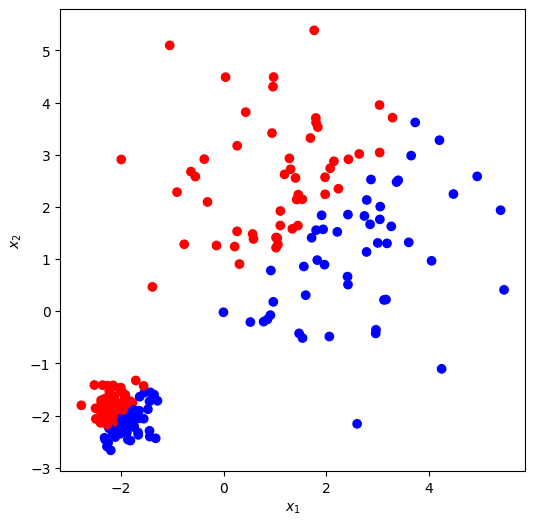

The accuracy of the prediction is: 51.5


In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
def pred(inputs, weight):
        summation = inputs[0]*weight[0]+inputs[1]*weight[1]+weight[2]
        if summation > 0:
            return 1
        else:
            return 0

weights = [1,-1,0]
output = []
for x in data_x:
    output.append(pred(x, weights))

total = 0
for i, x in enumerate(output):
    if x == data_y[i]:
        total += 1

accuracy = total/ len(output)*100

plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(output, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

print("The accuracy of the prediction is:",accuracy)

**b) [1 mark]** Train the model by going through each of the 200 elements in the data set in order once.  For each input, check if the output is correct.  If it is not correct, apply the Perceptron Learning Rule.   Use a learning rate of 0.1.

Now produce the same plot as in part a), but with your trained weights.  How accurate is the model now?  Report the $\omega$ and $\theta$ values.

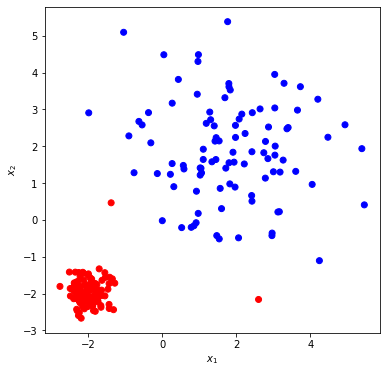

The accuracy of the prediction is: 99.0
w1= 14.276792694307412 w2= 22.06378938200869 bias= 0.5


In [68]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
def pred(inputs, weight):
        summation = inputs[0]*weight[0]+inputs[1]*weight[1]+weight[2]
        if summation > 0:
            return 1
        else:
            return 0

weights = [1,-1,0]
output = []
for x in data_x:
    output.append(pred(x, weights))

for i, x in enumerate(output):
    if x != data_y[i]:
        weights[0] += 0.1*data_x[i][0]*(data_y[i]-x)
        weights[1] += 0.1*data_x[i][1]*(data_y[i]-x)
        weights[2] += 0.1*1*(data_y[i]-x)

output2 = []
for x in data_x:
    output2.append(pred(x, weights))

total = 0
for i, x in enumerate(output2):
    if x == data_y[i]:
        total += 1
        
accuracy = total/ len(output2)*100

plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(output2, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

print("The accuracy of the prediction is:",accuracy)
print("w1=",weights[0],"w2=",weights[1],"bias=",weights[2])

**c) [1 mark]** Repeat the training in part b) enough times that the model is perfect (in that it correctly classifies all the inputs).  How many repetitions does this take?  Produce the same plots as in part a) and b), but with your new weights.  Report the $\omega$ and $\theta$ values.

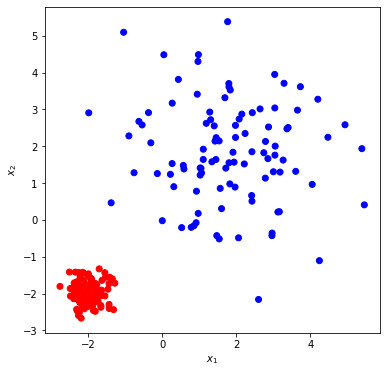

The accuracy of the prediction is: 100.0
w1= 12.74980769465882 w2= 19.37075700577906 bias= 8.799999999999985 Repetitions: 59


In [12]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
def pred(inputs, weight):
        summation = inputs[0]*weight[0]+inputs[1]*weight[1]+weight[2]
        if summation > 0:
            return 1
        else:
            return 0

accuracy = 0
runcount = 0
weights = [1,-1,0]
while accuracy < 100.0:
    output = []
    for x in data_x:
        output.append(pred(x, weights))
    
    for i, x in enumerate(output):
        if x != data_y[i]:
            weights[0] += 0.1*data_x[i][0]*(data_y[i]-x)
            weights[1] += 0.1*data_x[i][1]*(data_y[i]-x)
            weights[2] += 0.1*1*(data_y[i]-x)
    
    output2 = []
    for x in data_x:
        output2.append(pred(x, weights))
    
    total = 0
    for i, x in enumerate(output2):
        if x == data_y[i]:
            total += 1
            
    accuracy = total/ len(output2)*100
    runcount += 1

plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(output2, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

print("The accuracy of the prediction is:",accuracy)
print("w1=",weights[0],"w2=",weights[1],"bias=",weights[2], "Repetitions:", runcount)

**d) [1 mark]** Create a new Perceptron identical to the above one, but with a learning rate of 1.0.  Train this model until it reaches 100% accuracy.  How many repetitions does this take?  Produce the same plot again, but with your new weights.  Report the $\omega$ and $\theta$ values.

Now do the same thing with a learning rate of 0.01, and then again with a learning rate of 100.

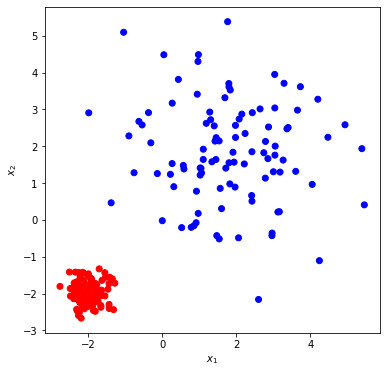

The accuracy of the prediction is: 100.0
w1= 129.0604781901764 w2= 195.29842318477768 bias= 89 Repetitions: 57 Alpha: 1


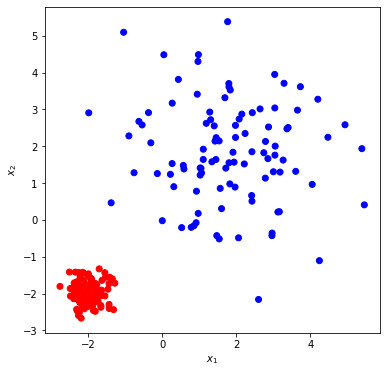

The accuracy of the prediction is: 100.0
w1= 1.202973133821125 w2= 1.785268300511776 bias= 0.8500000000000005 Repetitions: 76 Alpha: 0.01


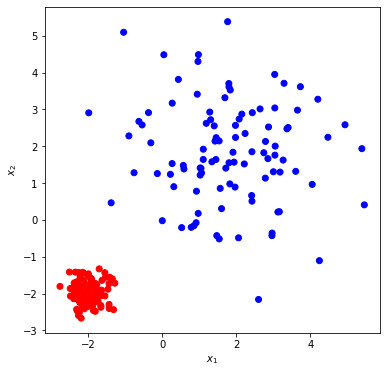

The accuracy of the prediction is: 100.0
w1= 12945.382453427868 w2= 19582.21834502294 bias= 8800 Repetitions: 56 Alpha: 100


In [70]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
def pred(inputs, weight):
        summation = inputs[0]*weight[0]+inputs[1]*weight[1]+weight[2]
        if summation > 0:
            return 1
        else:
            return 0

lrates = [1,0.01,100]
for y in lrates:
    accuracy = 0
    runcount = 0
    weights = [1,-1,0]
    while accuracy != 100:
        output = []
        for x in data_x:
            output.append(pred(x, weights))
        
        for i, x in enumerate(output):
            if x != data_y[i]:
                weights[0] += y*data_x[i][0]*(data_y[i]-x)
                weights[1] += y*data_x[i][1]*(data_y[i]-x)
                weights[2] += y*1*(data_y[i]-x)
        
        output2 = []
        for x in data_x:
            output2.append(pred(x, weights))
        
        total = 0
        for i, x in enumerate(output2):
            if x == data_y[i]:
                total += 1
                
        accuracy = total/ len(output2)*100
        runcount += 1
    
    plt.figure(figsize=(6,6))
    plt.scatter(data_x[:,0], data_x[:,1], c=np.where(output2, 'blue', 'red'))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()
    
    print("The accuracy of the prediction is:",accuracy)
    print("w1=",weights[0],"w2=",weights[1],"bias=",weights[2], "Repetitions:", runcount, "Alpha:" ,y)

### Question 2:

We will now try a more complex dataset, and use a pre-written implementation of the Perceptron.  The `sklearn` Python library https://scikit-learn.org/ has a large collection of machine learning algorithms, and comes with a variety of datasets.  It comes pre-installed with Anaconda or can be installed with `pip install scikit-learn`.

The dataset we will use is the UCI ML hand-written digits dataset https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

It is available with the following command:

In [15]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()

The inputs are 64 values, representing an 8x8 input image that is a low-resolution handwritten digit.  You can access this data as `digits.data`.  The correct label (i.e. the desired output) for each digit is accessed with `digits.target`.  Here are the first four input-output pairs:

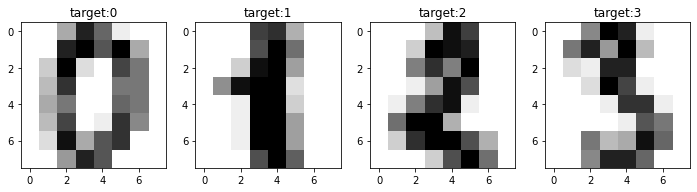

In [19]:
plt.figure(figsize=(12,3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
    plt.title(f'target:{digits.target[i]}')
plt.show()

You can create a Perceptron using the following command, where `eta0` is the learning rate:

In [ ]:
import sklearn.linear_model
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)

If you have an input data `X` and target output data `Y`, you can train the perceptron as follows:

In [ ]:
perceptron.fit(X, Y)

Once the Perceptron has been trained, you can see what outputs it actually generates given input `X` as follows:

In [ ]:
perceptron.predict(X)

In addition, `sklearn` provides a useful tool for separating your data into training and test data.

In [21]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True,
)

This splits all your data in `digits.data` into two parts, `X_train` and `X_test` (with the corresponding outputs in `Y_train` and `Y_test`).  The setting `test_size=0.2` means that the test set will be 20% of the data, and `shuffle=True` means it will randomly choose that 20%.

Note that you can also use the same function to split your training data into training data and validation data.

**a) [1 mark]** Let's start with only considering the digit data for 0's and 1's.  We can extract just that data with `X = digits.data[(digits.target == 0) | (digits.target == 1)]` and `Y = digits.target[(digits.target == 0) | (digits.target == 1)]`.  Split the data into 80% training and 20% testing.  Create a Perceptron with a learning rate of 1.0 and train it on your training data.  Report the accuracy (i.e. how often the model gives the correct output) on your testing data.

In [114]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

digits = sklearn.datasets.load_digits()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data[(digits.target == 0) | (digits.target == 1)], digits.target[(digits.target == 0) | (digits.target == 1)], test_size=0.2, shuffle=True,
)

perceptron = sklearn.linear_model.Perceptron(eta0=1.0)
perceptron.fit(X_train, Y_train)
output = perceptron.predict(X_test)

total = 0
accuracy = 0
for i, x in enumerate(output):
    if x == Y_test[i]:
        total += 1
accuracy = total/len(output)*100
print("The accuracy of the prediction is:",accuracy)



The accuracy of the prediction is: 98.61111111111111


**b) [1 mark]** Repeat the above, but with the entire data set (i.e. all 10 digits).  Report the accuracy.  How does the accuracy change as you adjust the learning rate?  Make a plot that shows this.

The accuracy of the prediction when the learning rate is 1: 95.27777777777777


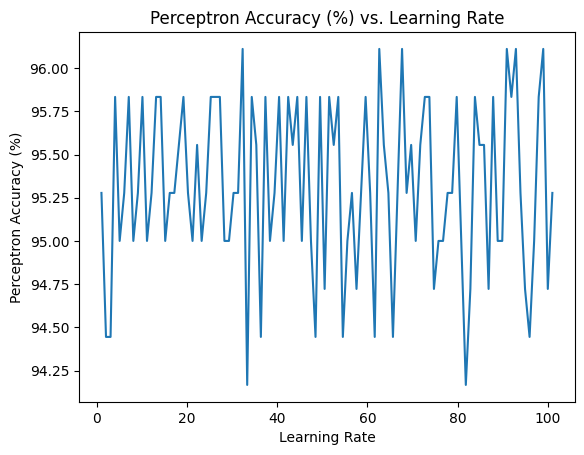

In [7]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt

digits = sklearn.datasets.load_digits()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True,
)

perceptron = sklearn.linear_model.Perceptron(eta0=1)
perceptron.fit(X_train, Y_train)
output = perceptron.predict(X_test)

total = 0
accuracy = 0
for i, x in enumerate(output):
    if x == Y_test[i]:
        total += 1
accuracy = total/len(output)*100
print("The accuracy of the prediction when the learning rate is 1:",accuracy)

modelacc = []
lrates = np.linspace(1, 101, 100)
for lrate in lrates:
    perceptron = sklearn.linear_model.Perceptron(eta0=lrate)
    perceptron.fit(X_train, Y_train)
    output2 = perceptron.predict(X_test)
    total2 = 0
    accuracy2 = 0
    for b, a in enumerate(output2):
        if a == Y_test[b]:
            total2 += 1
    accuracy2 = total2/len(output2)*100
    modelacc.append(accuracy2)

plt.title('Perceptron Accuracy (%) vs. Learning Rate')
plt.plot(lrates, modelacc)
plt.xlabel('Learning Rate')
plt.ylabel('Perceptron Accuracy (%)')
plt.show()

2b) With variance in learning rate, there shows little to no correlation between the model's accuracy and the model's learning rate.

**c) [1 mark]** What mistakes does the model make?  What digits does it tend to mistake for other digits?  Use the `plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')` command given above to plot some of the digits that it gets wrong.  Why do you think it has problems with these digits?

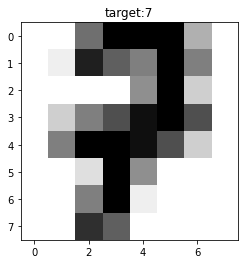

Predicted value: 1
The accuracy of the prediction is: 98.61111111111111


In [156]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

digits = sklearn.datasets.load_digits()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data[(digits.target == 0) | (digits.target == 1)], digits.target[(digits.target == 0) | (digits.target == 1)], test_size=0.2, shuffle=True,
)

perceptron = sklearn.linear_model.Perceptron(eta0=1.0)
perceptron.fit(X_train, Y_train)
output = perceptron.predict(X_test)

total = 0
accuracy = 0
for i, x in enumerate(output):
    if x == Y_test[i]:
        total += 1
    else:
        plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
        plt.title(f'target:{digits.target[i]}')
        plt.show()
        print('Predicted value:', x)
accuracy = total/len(output)*100
print("The accuracy of the prediction is:",accuracy)



## Question 2c)

Upon running the model for multiple iterations, the example above showed up on various instances.

With the given example above, the perceptron model is incorrectly predicting the digit '7' as a 1. The numbers 7 and 1 have very similar characteristics when it comes to pixel density in the top third and bottom third of the pixel image. With these very similar pixel densities, it's understandable that the model would output these occurrences on a more often basis.

Other examples of digits where pixel densities in certain sections of the image that could be similar would be the following combinations: 9 and 0, 8 and 0, 6 and 0, 2 and 9, 7 and 9. 

### Question 3:

The following code generates the same data that was used to demonstrate curve fitting in class.  `train_x` and `train_y` are the 10 data points we use for doing the curve fitting, and `test_x` and `test_y` are the data we used to test how well the fit generalizes.

In [13]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

**a) [1 mark]** Find the weights that best fit this data using linear regression.  This should generate two weights: one that is multiplied by the input value and one that is mulitplied by the feature that is constantly a 1.  Implement this yourself, rather than using the `sklearn.linear_model.LinearRegression` implementation that we will use in Question 4.  To invert the matrix, use `np.linalg.pinv`.  

Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error (`np.sqrt(np.mean((Y-output)**2))` where `Y` is the vector of desired outputs and `output` is the vector of the actual outputs from the model) for both the training data and the testing data.

The weights given from training are: [-1.50188406  0.82474435]


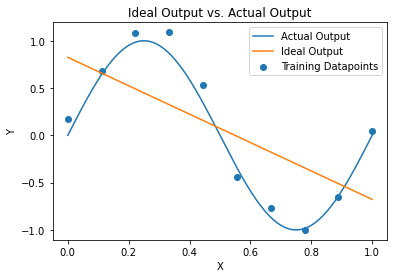

The RMSE for the model against the training data is: 0.5478656176519362
The RMSE for the model against the test data is: 0.46483262950123677


In [14]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

x_train = []
for x in train_x:
    x_train.append([x,1])
x_train=np.array(x_train)

weights = np.dot(np.dot(np.linalg.pinv(np.dot(x_train.transpose(), x_train)),x_train.transpose()),train_y)
print('The weights given from training are:',weights)

outputtrain = []
for x in train_x:
    outputtrain.append(weights[0]*x+weights[1]) 

rmsetrain = np.sqrt(np.mean((train_y-outputtrain)**2))

outputtest = []
for x in test_x:
    outputtest.append(weights[0]*x+weights[1]) 

rmsetest = np.sqrt(np.mean((test_y-outputtest)**2))

plt.title('Ideal Output vs. Actual Output')
plt.scatter(train_x, train_y, label='Training Datapoints')
plt.plot(test_x, test_y, label='Actual Output')
plt.plot(test_x, outputtest, label='Ideal Output')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="upper right")
plt.show()

print('The RMSE for the model against the training data is:', rmsetrain)
print('The RMSE for the model against the test data is:', rmsetest)



**b) [1 mark]** Repeat part a), but use the first 5 polynomials as features ($x^0, x^1, x^2, x^3, x^4$).  Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error for both the training data and the testing data.  Do not use regularization.

The weights given from training are: [  0.09121908   9.97654202 -27.72073974  13.5425296    4.2194939 ]


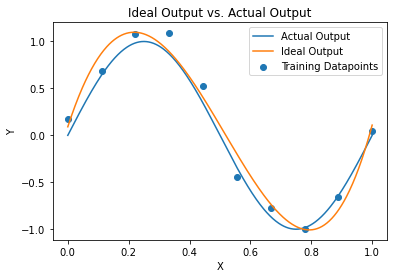

The RMSE for the model against the training data is: 0.13652971934310248
The RMSE for the model against the test data is: 0.12757359049536038


In [15]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

x_train = []
for x in train_x:
    x_train.append([1,x,pow(x,2),pow(x,3),pow(x,4)])
x_train=np.array(x_train)

weights = np.dot(np.dot(np.linalg.pinv(np.dot(x_train.transpose(), x_train)),x_train.transpose()),train_y)
print('The weights given from training are:',weights)

outputtrain = np.dot(x_train,weights)

rmsetrain = np.sqrt(np.mean((train_y-outputtrain)**2))

x_test = []
for x in test_x:
    x_test.append([1,x,pow(x,2),pow(x,3),pow(x,4)])
x_test=np.array(x_test)

outputtest = np.dot(x_test,weights)

rmsetest = np.sqrt(np.mean((test_y-outputtest)**2))

plt.title('Ideal Output vs. Actual Output')
plt.scatter(train_x, train_y, label='Training Datapoints')
plt.plot(test_x, test_y, label='Actual Output')
plt.plot(test_x, outputtest, label='Ideal Output')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="upper right")
plt.show()

print('The RMSE for the model against the training data is:', rmsetrain)
print('The RMSE for the model against the test data is:', rmsetest)


**c) [1 mark]** Vary the number of polynomials you use from 1 up to 15.  Compute the Root Mean Squared Error for the training and testing data and plot the results.

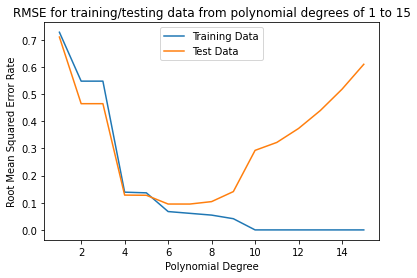

In [13]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

def weights(a,b):
    product = np.linalg.pinv(np.dot(a.transpose(), a))
    return np.dot(np.dot(product,a.transpose()),b)
    
def features(a,degree):
    out = []
    for x in a:
        row = []
        for i in range(0, degree):
            row.append(pow(x,i))
        out.append(row)
    return np.array(out)
    
def pred(a,b):
    return np.dot(a,b)

rmsetrain = []
rmsetest = []
degrees = []
for i in range (1,16):
    degrees.append(i)
    
    x_train = features(train_x,i)
    x_test = features(test_x,i)
    
    modelw = weights(x_train,train_y)
    
    outputtrain = pred(x_train,modelw)
    rmsetr = np.sqrt(np.mean((train_y-outputtrain)**2))
    rmsetrain.append(rmsetr)
    
    outputtest = pred(x_test,modelw)
    rmsete = np.sqrt(np.mean((test_y-outputtest)**2))
    rmsetest.append(rmsete)

plt.title('RMSE for training/testing data from polynomial degrees of 1 to 15')
plt.plot(degrees, rmsetrain, label='Training Data')
plt.plot(degrees, rmsetest, label='Test Data')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error Rate')
plt.legend(loc="upper center")
plt.show()


**d) [1 mark]** Now introduce regularization to your model.  Set the number of polynomials to 10 and vary the amount of regularization.  Use `lambds = np.exp(np.linspace(-50,-1, 50))` to generate the list of 50 different regularization values to try (logarithmically spaces between $e^{-50}$ and $e^{-1}$).  Compute the Root Mean Squared Error for the training and testing data and plot the results.  Note that `plt.semilogx` lets you create a plot where the x-axis is on a log scale, like the version of this plot we saw in class.

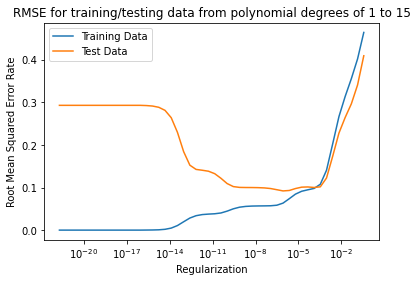

In [16]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)
lambds = np.exp(np.linspace(-50,-1, 50))

def weights(a,b,l):
    product = np.linalg.pinv(np.dot(a.transpose(), a)+l*np.identity(a.shape[0]))
    return np.dot(np.dot(product,a.transpose()),b)
    
def features(a,degree):
    out = []
    for x in a:
        row = []
        for i in range(0, degree):
            row.append(pow(x,i))
        out.append(row)
    return np.array(out)
    
def pred(a,b):
    return np.dot(a,b)

rmsetrain = []
rmsetest = []
x_train = features(train_x,10)
x_test = features(test_x,10)

for lambd in lambds:  
    modelw = weights(x_train,train_y,lambd)
    
    outputtrain = pred(x_train,modelw)
    rmsetr = np.sqrt(np.mean((train_y-outputtrain)**2))
    rmsetrain.append(rmsetr)
    
    outputtest = pred(x_test,modelw)
    rmsete = np.sqrt(np.mean((test_y-outputtest)**2))
    rmsetest.append(rmsete)

plt.title('RMSE for training/testing data from polynomial degrees of 1 to 15')
plt.semilogx(lambds, rmsetrain, label='Training Data')
plt.semilogx(lambds, rmsetest, label='Test Data')
plt.xlabel('Regularization')
plt.ylabel('Root Mean Squared Error Rate')
plt.legend(loc="upper left")
plt.show()

### Question 4:

We will now use the regression tool built in to `sklearn`.  We create it as follows.  Note that it is called `Ridge` due to how regularization is implemented: we add a value onto the diagonal of the matrix being inverted.  You can think of this as adding a diagonal ridge to whatever data is in the matrix.  For this reason, this is often called "ridge regression".  The parameter `alpha` sets the amount of regression (it is the same as what we called $\lambda$ in class).

In [229]:
import sklearn.linear_model
reg = sklearn.linear_model.Ridge(alpha=0.000001)

We use the regression system using exactly the same functions as the Perceptron.  Here we train it using `X` and `Y`, and then determine what the outputs are given `X`.

In [ ]:
reg.fit(X, Y)
output = reg.predict(X)

For data, we are going to use the Diabetes dataset from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html which is also built in to `sklearn`.  You can load this data set using

In [24]:
diabetes = sklearn.datasets.load_diabetes()

As with the digits dataset, you can access the `X` values with `diabetes.data` and the `Y` values with `diabetes.target`.  See https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset for an explanation of what the different data values mean.

**a) [1 mark]** Split the data evenly into three parts: 1/3rd training, 1/3rd validation, and 1/3rd testing.  This will involve calling `sklearn.model_selection.train_test_split` twice.  Train the model using various different amounts of regularization from $e^{-20)$ to $e^5$ (`lambds = np.exp(np.linspace(-20,5,50))`).  Compute the Root Mean Squared Error on the training and validation datasets and plot how this error changes for different amounts of regularization.  Using these results, pick a good value for regularization and then apply this to your testing data.  Report the Root Mean Squared Error for the testing data.

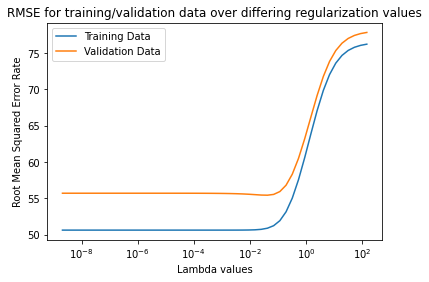

The optimal regularization value was found to be: [0.04228743]
The RMSE on the test set for the regularization value was: [56.422381465376105]


In [11]:
import sklearn.linear_model
import sklearn.datasets
import numpy as np

diabetes = sklearn.datasets.load_diabetes()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.33, shuffle=True)

X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.5, shuffle=True)

lambds = np.exp(np.linspace(-20,5,50))

rmseval = []
rmsetrain = []

for lambd in lambds:  
    reg = sklearn.linear_model.Ridge(alpha=lambd)
    
    reg.fit(X_train, Y_train)
    outputtrain = reg.predict(X_train)
    outputval = reg.predict(X_val)
    
    rmsetr = np.sqrt(np.mean((Y_train-outputtrain)**2))
    rmsetrain.append(rmsetr)
    
    rmsev = np.sqrt(np.mean((Y_val-outputval)**2))
    rmseval.append(rmsev)

plt.title('RMSE for training/validation data over differing regularization values')
plt.semilogx(lambds, rmsetrain, label='Training Data')
plt.semilogx(lambds, rmseval, label='Validation Data')
plt.xlabel('Lambda values')
plt.ylabel('Root Mean Squared Error Rate')
plt.legend(loc="upper left")
plt.show()

min_rmse = min(rmseval)
regval= lambds[np.where(rmseval == min_rmse)]

reg = sklearn.linear_model.Ridge(alpha=regval)
reg.fit(X_train, Y_train)
rmsetest = []
outputtest = reg.predict(X_test)
rmsete = np.sqrt(np.mean((Y_test-outputtest)**2))
rmsetest.append(rmsete)
print('The optimal regularization value was found to be:', regval)
print('The RMSE on the test set for the regularization value was:',rmsetest)

**b) [1 mark]** How consistent is this result?  That is, if you redo part a) but with a different randomly chosen split in the data, do you get the same results?  What overall pattern do you see?  Do the results show signs of overfitting?  Would you expect overfitting here?  Why or why not?

4b) The RMSE values being plotted over various regularization values stays consistent in general shape, with values ranging from 50-85 for both the training and validation sets. Although from each run, the graph changes slightly, there is a certain characteristic of the plot that remain constant. The validation set's RMSE has a local minima between lambda values of 10^-2^ and 10^-0.5^. This lambda value is used for the test set and would likely provide the optimal RMSE value on the test dataset. 

As for overfitting, there is little difference between RMSE values of both datasets, when regularization is low (10^-8^). This low indifference shows as evidence that the model isn't overfitting. If the model were overfitting on the training dataset, it's results compared to the the validation dataset would be night and day.  

**c) [1 mark]** Now let's try regression using polynomials as our features.  Again, `sklearn` has a tool to convert our `X` data into a version with all the polynomials calculated.  Note that our `X` data has 10 inputs ($x_1; x_2; x_3; ... x_{10}$) so when converted to polynomials up to degree 2 it will include $x_1^2, x_1x_2, x_1x_3, ... x_2^2, x_2x_3$, and so on.  Here is how you convert the raw input data into the features `F` that you can then use instead of `X`:

In [25]:
F = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(diabetes.data)

Now repeat part a) using the new features.  How does this change the result?

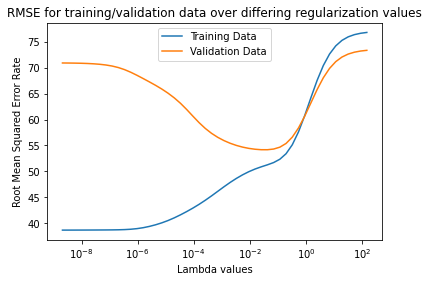

The optimal regularization value was found to be: [0.04228743]
The RMSE on the test set for the regularization value was: [57.23488493420724]


In [16]:
import sklearn.linear_model

diabetes = sklearn.datasets.load_diabetes()

F = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(diabetes.data)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(F, diabetes.target, test_size=0.33, shuffle=True)

X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.5, shuffle=True)

lambds = np.exp(np.linspace(-20,5,50))

rmseval = []
rmsetrain = []

for lambd in lambds:  
    reg = sklearn.linear_model.Ridge(alpha=lambd)
    
    reg.fit(X_train, Y_train)
    outputtrain = reg.predict(X_train)
    outputval = reg.predict(X_val)
    
    rmsetr = np.sqrt(np.mean((Y_train-outputtrain)**2))
    rmsetrain.append(rmsetr)
    
    rmsev = np.sqrt(np.mean((Y_val-outputval)**2))
    rmseval.append(rmsev)

plt.title('RMSE for training/validation data over differing regularization values')
plt.semilogx(lambds, rmsetrain, label='Training Data')
plt.semilogx(lambds, rmseval, label='Validation Data')
plt.xlabel('Lambda values')
plt.ylabel('Root Mean Squared Error Rate')
plt.legend(loc="upper center")
plt.show()

min_rmse = min(rmseval)
regval= lambds[np.where(rmseval == min_rmse)]

reg = sklearn.linear_model.Ridge(alpha=regval)
reg.fit(X_train, Y_train)
rmsetest = []
outputtest = reg.predict(X_test)
rmsete = np.sqrt(np.mean((Y_test-outputtest)**2))
rmsetest.append(rmsete)
print('The optimal regularization value was found to be:', regval)
print('The RMSE on the test set for the regularization value was:',rmsetest)

4c) The results from Question 4A differ in shape for both the training and validation datasets. The training dataset starts from a much lower RMSE value, while the Validation dataset starts much higher in comparison to Question 4A's results. However, from each run on a different randomly selected set of data, the characteristic of the validation remains the same from Question 4A, as a local minima is reached between values of 10^-2^ and 10^0^. This was also the optimal lambda value that was chosen to be used for the test dataset. 

In comparison to Question 4A, this plot shows signs of overfitting, as the RMSE for both datasets show a large gap when the regularization value is extremely low. As the regualization is the tolerance on accuracy from desired and actual outputs, the low RMSE value for the training dataset indicates that the model is over-performing while under-performing on newly seen data (a.k.a the Validation dataset). 

**d) [1 mark]** Increase the degree of polynomials used.  Try values up to at least 5.  Compute the same plots as in part a).  How does this change the plots?  Why does this happen?  What happens if you increase the degree up to even larger values like 10 or 20?  Why?

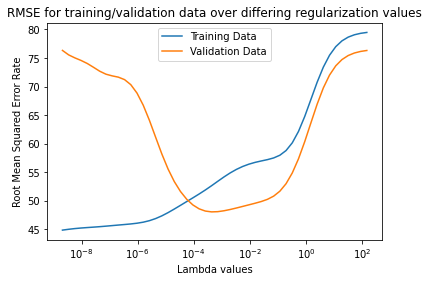

The degree for this iteration: 2
The optimal regularization value was found to be: [0.00042855]
The RMSE on the test set for the regularization value was: [56.32892434201376]


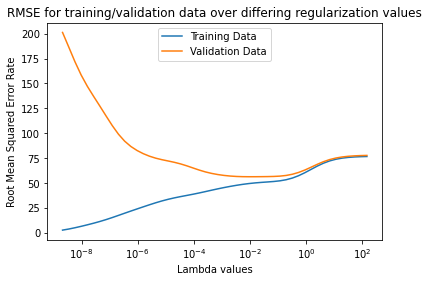

The degree for this iteration: 3
The optimal regularization value was found to be: [0.00915113]
The RMSE on the test set for the regularization value was: [55.287125159023034]


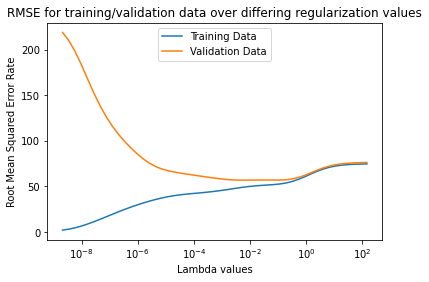

The degree for this iteration: 4
The optimal regularization value was found to be: [0.00549409]
The RMSE on the test set for the regularization value was: [54.08913841007926]


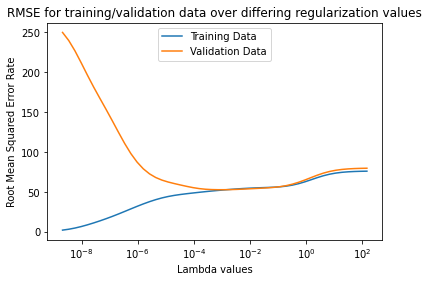

The degree for this iteration: 5
The optimal regularization value was found to be: [0.00071381]
The RMSE on the test set for the regularization value was: [53.007418729935424]


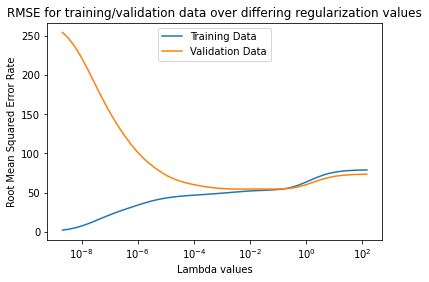

The degree for this iteration: 6
The optimal regularization value was found to be: [0.00549409]
The RMSE on the test set for the regularization value was: [53.43445717751663]


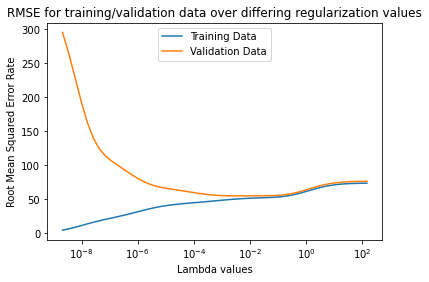

The degree for this iteration: 10
The optimal regularization value was found to be: [0.00329851]
The RMSE on the test set for the regularization value was: [55.26591555147163]


In [17]:
import sklearn.linear_model
diabetes = sklearn.datasets.load_diabetes()

for i in [2,3,4,5,6,10]:
    F = sklearn.preprocessing.PolynomialFeatures(degree=i).fit_transform(diabetes.data)
    
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(F, diabetes.target, test_size=0.33, shuffle=True)
    
    X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.5, shuffle=True)
    
    lambds = np.exp(np.linspace(-20,5,50))
    
    rmseval = []
    rmsetrain = []
    
    for lambd in lambds:  
        reg = sklearn.linear_model.Ridge(alpha=lambd)
        
        reg.fit(X_train, Y_train)
        outputtrain = reg.predict(X_train)
        outputval = reg.predict(X_val)
        
        rmsetr = np.sqrt(np.mean((Y_train-outputtrain)**2))
        rmsetrain.append(rmsetr)
        
        rmsev = np.sqrt(np.mean((Y_val-outputval)**2))
        rmseval.append(rmsev)
    
    plt.title('RMSE for training/validation data over differing regularization values')
    plt.semilogx(lambds, rmsetrain, label='Training Data')
    plt.semilogx(lambds, rmseval, label='Validation Data')
    plt.xlabel('Lambda values')
    plt.ylabel('Root Mean Squared Error Rate')
    plt.legend(loc="upper center")
    plt.show()
    
    min_rmse = min(rmseval)
    regval= lambds[np.where(rmseval == min_rmse)]

    reg = sklearn.linear_model.Ridge(alpha=regval)
    reg.fit(X_train, Y_train)
    rmsetest = []
    outputtest = reg.predict(X_test)
    rmsete = np.sqrt(np.mean((Y_test-outputtest)**2))
    rmsetest.append(rmsete)
    print('The degree for this iteration:', i)
    print('The optimal regularization value was found to be:', regval)
    print('The RMSE on the test set for the regularization value was:',rmsetest)

4d) With the variance of polynomial degrees, the shape of the respective plots differ drastically. As the degree of polynomials increase, there seems to be a larger disparity between the RMSE values of Training and Validation datasets with a low regularization value (10^-8^). Also, as the polynomial degree increases, both datasets seem to converge as the regularization value gets larger (10^2^). Most optimal regularization values seem to remain in a range between 10^-1^ and 10^-3^.

With note to the large disparties between RMSE values, all plots indicate signs of overfitting. It is also to be noted, as the disparity grows in relation to polynomial degree, the model also inreasingly becomes overfitted.